# Project: Wrangling and Analyze Data

## Importing libraries

In [92]:
# Importing Library.

# Importing pandas to work with DataFrames.
import pandas as pd
pd.set_option('mode.chained_assignment','raise')

# Importing numpy to general methods.
import numpy as np

# Importing OS package to write and open files.
import os

# Importing the requests to create a object from a given URL.
import requests

# Importing the Client Code to use the Twitter API.
import tweepy

# Importing the json package to easy my task with json files
import json

# Importing the time package to calculate the elapse time to access the Twitter API
import time

# Importing the re package to use the regular expressions.
import re

# Importing the matplotlib to create graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Import seaborn to better the visualization
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [93]:
# Creating a folder to store the files.
folder = "resources" # Folder's name.

# Checking if the folder already exist.
if not folder in os.listdir():
    os.mkdir(folder)  # Creating the folder when 01-Dataset do not exist.

# List of files.
list_url = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv',
            'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv']

# Loop to download the two files hosted in Udacity website.
for url in list_url:
    if not url.split('/')[-1].replace('-','_') in os.listdir(folder):                              # Check if the files already exist.
        response = requests.get(url)                                                               # Creating an object of the given URL.
        with open(os.path.join(folder,url.split('/')[-1].replace('-','_')), mode = 'wb') as file:  # Defining the file name.
            file.write(response.content)       

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [94]:
# Loading the image precictions
df_img = pd.read_csv('resources/image_predictions.tsv', sep = '\t') # tsv file need to configure the sep as tabular.

# Loading the archive of WeRateDogs.
df_ach = pd.read_csv('resources/twitter_archive_enhanced.csv') # regular csv file.

In [95]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [96]:
df_ach.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [97]:
#I am having difficulties with my twitter account. Hence using the tweet_json.txt file provided

In [98]:
df_twt_raw = pd.read_json('resources/tweet_json.txt', orient = 'index') 
df_twt_raw.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1998-04-12 22:37:23.555336193,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38075,0,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8328,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-10 03:03:41.306343426,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32680,0,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6151,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-05 22:26:21.378084864,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24593,0,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4070,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-04 11:32:37.279858688,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41433,0,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8471,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-31 06:59:18.926688256,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39613,0,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9166,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


*We have gathered all the 3 required datasets :*
1. twitter_archive_enhanced.csv as df_ach
2. image_predictions.tsv as df_img
3. tweet_json.txt as df_twt_raw

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### twitter_archive_enhanced.csv

In [99]:
#First 5 values of the dataframe
df_ach.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [100]:
#Last 5 values of the dataframe
df_ach.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


### Observation
> Column - Name: <br>1. Has Null values<br>2. Inconsistent values (character in names)

> Column - Source: <br>1. HTML tags

In [101]:
# What is the most commom name to a Dog!?
df_ach.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Toby          7
Buddy         7
Daisy         7
an            7
Bailey        7
Koda          6
Milo          6
Scout         6
Jack          6
Leo           6
Stanley       6
Bella         6
Dave          6
Oscar         6
Jax           6
Rusty         6
Phil          5
           ... 
Gordon        1
Sephie        1
Mookie        1
Maude         1
Tuck          1
Mark          1
Rhino         1
Gabby         1
Ronnie        1
Snickers      1
Devón         1
Napolean      1
Nigel         1
Ralpher       1
Trevith       1
Jay           1
Barry         1
Aja           1
Mingus        1
Jordy         1
Flash         1
Kirk          1
Koko          1
Chuq          1
Arya          1
Blu           1
Dex           1
River         1
Yukon         1
Bert          1
Name: name, Length: 957,

### Observation
**Inconsistencies in Name**
> 1) Presence of `None` 745<br>2) 55 occurrences of `a`<br>3) 8 occurrences of `the`<br>4) 7 occurrences of `an`


In [102]:
# What is the most commom denominator. I guess it must be 10.
df_ach.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [103]:
# In the past @dog_rates used to rate with grades between 0 to 10.
df_ach.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Observation
><br>1. Invalid Numerator<br>2. Invalid Denominator

In [104]:
# An overview of the df_ach.
df_ach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [105]:
# Subsetting the df_ach to find a retweet.
df_ach[df_ach.name == 'Sierra']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [106]:
# Duplicated tweet_id.
sum(df_ach.tweet_id.duplicated())

0

### image_predictions.tsv

In [107]:
# Printing the first 5 rows.
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [108]:
# Printing the last 5 rows.
df_img.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


#### Observation
> p1,p2,p3 needs to be standardized

In [109]:
# An overview of the df_img.
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Observation
> tweet_id to be converted as string

In [110]:
# Duplicated tweet_id.
sum(df_img.tweet_id.duplicated())

0

In [111]:
# Duplicated jpg_url.
sum(df_img.jpg_url.duplicated())

66

#### Observation
>Column jpg_url is found to be duplicated

>Based on the tidy data concept, these two tables (`twitter_archive_enhanced.csv` and `image_predictions.tsv`) could be merged into one, using the `tweet_id` as a mapping key.

### Quality issues
#### twitter_archive_enhanced.csv
1. Invalid names or non-standard names.

2. Invalid ratings numerator. Value varies from 1776 to 0. Data Structure must be converted from int to float.

3. Invalid denominator, I expected a fixed base. Data Structure must be converted from int to float.

4. timestamp is a String, It needs to be converted to date.

5. tweet_id must be a string.

6. retweeted_status_id : The same dog could be recorded twice or more in cases of retweets.

7. in_reply_to_status_id : The same dog could be recorded twice or more in cases of reply.

8. source column is having 	HTML tags, URL, and content in a single column.

#### image_predictions.tsv
9. Columns p1,p2 & p3 : Dog's breed has no standard. Capital letter or lowercase names.

10. tweet_id needs to be converted as string

11. Column jpg_url has duplicated images and consequently double entry.

### Tidiness issues
#### twitter_archive_enhanced.csv
1. doggo, floofer, pupper, and puppo. These are categorical variable, can be combined into one column.

2. text : There is two information in a single column. need to split the text from the URL.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [112]:
# Make copies of original pieces of data
# Copying the df_img.
df_img_cln = df_img.copy()

# Copying the df_ach.
df_ach_cln = df_ach.copy()

# Copying the df_twt_raw. 
df_twt_cln = df_twt_raw.copy()

In [113]:
# Creating the twitter_archive_master.
twt_ach_mstr = pd.merge(df_ach_cln, df_img_cln, on = 'tweet_id')

There is no correct sequence to fix the issues, we will begin with handling duplicates. 

### Quality Issue #11:
Column jpg_url has duplicated images and consequently double entry.

#### Define:
Remove all duplicated images (based on the URL).

#### Code

In [114]:
# Vector to indexing the duplicated jpg url.
indexing = df_img.jpg_url.duplicated()

# I want the opposite. All observations except the duplicated.
indexing = np.logical_not(indexing)

# Subsetting and assigning to the df_img cleaned.
df_img_cln = df_img_cln[indexing]

# New dimensions of df_img_cln
print("Before: {} rows.\nAfter: {} rows.".format(df_img_cln.shape[0], df_img.shape[0]))

Before: 2009 rows.
After: 2075 rows.


#### Test

In [115]:
# Testing the code given the defined solution.
print("{} duplicated.".format(sum(df_img_cln.jpg_url.duplicated())))

0 duplicated.


### Quality Issue #6 & #7 combined
* retweeted_status_id : The same dog could be recorded twice or more in cases of retweets.
* in_reply_to_status_id : The same dog could be recorded twice or more in cases of reply.

#### Define
* Remove any tweet with retweeted_status_id non-null, and
* Remove any tweet with in_reply_to_status_id non-null

#### Code

In [116]:
# Creating a vector to select the retweeted_status_id different of Null.
indexing = df_ach_cln.retweeted_status_id.isnull()

# Subsetting the df_ach_cln excluding the retweeted. 
df_ach_cln = df_ach_cln[indexing]


# CODE - Issue ID 10
# Creating a vector to select the in_reply_to_status_id different of Null.
indexing = df_ach_cln.in_reply_to_status_id.isnull()

# Subsetting the df_ach_cln excluding the reply.
df_ach_cln = df_ach_cln[indexing]

#### Test

In [117]:
# Testing: Expect all rows as True when using the .isnull()  
print("Number of rows with true in retweeted_status_id:", sum(df_ach_cln.retweeted_status_id.isnull()))

# Testing: Expect all rows as True when using the .isnull()  
print("Number of rows with true in in_reply_to_status_id:", sum(df_ach_cln.in_reply_to_status_id.isnull()))

# Number of rows in df_ach_cln.
print("Number of rows of df_ach_cln:",df_ach_cln.shape[0])

Number of rows with true in retweeted_status_id: 2097
Number of rows with true in in_reply_to_status_id: 2097
Number of rows of df_ach_cln: 2097


In [118]:
# Printing the values of denominator
twt_ach_mstr.rating_denominator.value_counts()

10     2057
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

### Quality Issue #5
tweet_id must be a string

#### Define
Convert tweet_id to str.

#### Code

In [119]:
# Converting the tweet_id to string.
df_ach_cln.tweet_id = df_ach_cln.tweet_id.astype(str)

#### Test

In [120]:
# Printing the info to ensure the convertion. Bear in mind, in pandas object is string. 
df_ach_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(2), object(11

### Quality Issue #10
tweet_id needs to be converted as string

#### Define
Convert tweet_id to str.

#### Code

In [121]:
# Converting the tweet_id to string.
df_img_cln.tweet_id = df_img_cln.tweet_id.astype(str)

#### Test

In [122]:
# Printing the info to ensure the convertion. Bear in mind, in pandas object is string. 
df_img_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


*Based on the .info() the tweet_id has converted as object, which is in pandas the same of a string.*

#### Merging dataframes

In [123]:
# Creating the twitter_archive_master.
twt_ach_mstr = pd.merge(df_ach_cln, df_img_cln, on = 'tweet_id')

### Quality Issue #1
Invalid names or non-standard names.

#### Define
Rename non-standard names to "None"

#### Code

In [124]:
# Initialization of variable.
non_names = []

# Loop to find ordinary word.
for index in twt_ach_mstr.name:
    # Will check every name start with lowercase.
    if index.islower():
        # If yes will append to non_names.
        non_names.append(index)

# The list will filter only unique values
non_names = list(set(non_names))

# Printing non-standard names.
non_names

['a',
 'an',
 'actually',
 'his',
 'by',
 'space',
 'quite',
 'very',
 'such',
 'incredibly',
 'the',
 'just',
 'light',
 'my',
 'all',
 'one',
 'officially',
 'getting',
 'unacceptable',
 'not',
 'infuriating',
 'this']

In [125]:
# Loop to replace each non standard name (non_name).
for index in non_names:
    twt_ach_mstr.name.replace(index,
                              "None",
                              inplace = True)

#### Test

In [126]:
# Based on the list of non-standard names. Let's ensure if all have been removed.
sum(twt_ach_mstr.name.isin(non_names))

0

*As an additional issue, we earlier observed HTML tags, URL, and content in a single column. We need to fix that*

#### Define
* Remove HTML tags;
* Create a new column to store the href
* Assign to the source column the content between HTML tags

#### Code

In [127]:
# Creating auxiliary list to store the source and source_url.
aux_ls_sr = []
aux_ls_sr_url = [] 

# This loop will remove all HTML tags using .split() and indexing.
for index in twt_ach_mstr.source:
    aux_ls_sr.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[1] )
    aux_ls_sr_url.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[0] )

# Updating the source column with aux_ls_sr.
twt_ach_mstr.source = aux_ls_sr

# Appending a new column with source_url info.
twt_ach_mstr = pd.concat([twt_ach_mstr, pd.DataFrame(aux_ls_sr_url, columns = ['source_url'])], axis = 1)

#### Test

In [128]:
# Printing the first 5 rows of a subsetted data frame.
twt_ach_mstr[['tweet_id','source','source_url']].head()

,tweet_id,source,source_url
0,892420643555336193,Twitter for iPhone,http://twitter.com/download/iphone
1,892177421306343426,Twitter for iPhone,http://twitter.com/download/iphone
2,891815181378084864,Twitter for iPhone,http://twitter.com/download/iphone
3,891689557279858688,Twitter for iPhone,http://twitter.com/download/iphone
4,891327558926688256,Twitter for iPhone,http://twitter.com/download/iphone


In [129]:
# Printing the categories of source column.
twt_ach_mstr.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [130]:
# Printing the new column.
twt_ach_mstr.source_url.value_counts()

http://twitter.com/download/iphone              1932
http://twitter.com                                28
https://about.twitter.com/products/tweetdeck      11
Name: source_url, dtype: int64

### Tidiness Issue #2
text : There is two information in a single column. need to split the text from the URL.

#### Define
* Remove the URL in the end of the text column
* Create a new column to store the URL in the end of each tweet

#### Code

In [131]:
# Creating auxiliary list to store the text and text_url.
aux_txt = []
aux_txt_url = [] 

# This loop will remove all HTML tags using .split() and indexing.
for index in twt_ach_mstr.text:
    aux_txt.append(' '.join(index.split(" ")[:-1]))
    aux_txt_url.append(index.split(" ")[-1])

# Updating the source column with aux_ls_sr.
twt_ach_mstr.text = aux_txt

# Appending a new column with source_url info.
twt_ach_mstr = pd.concat([twt_ach_mstr, pd.DataFrame(aux_txt_url, columns = ['text_url'])], axis = 1)

#### Test

In [132]:
# Printing the first 5 rows of a subsetted dataframe. 
twt_ach_mstr[['tweet_id','text','text_url']].head()

,tweet_id,text,text_url
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f


In [133]:
# Printing the first 5 rows of text column.
twt_ach_mstr.text.tolist()[:5]

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek']

*The URL was removed and assigned to a new column (text_url) and the text is free of URL at the end of each tweet.*

### Quality Issue #2 & #3
* Invalid ratings numerator. Value varies from 1776 to 0. Data Structure must be converted from int to float.
* Invalid denominator, I expected a fixed base. Data Structure must be converted from int to float.

#### Define
* Convert rating_numerator and rating_denominator to float
* Remove the extreme values (1776, 420, etc.) of rating_numerator
* Remove non expected value of denominator, anything different of 10

#### Code

In [134]:
# Converting the rating_numerator and rating_denominator to float.
twt_ach_mstr.rating_numerator = twt_ach_mstr.rating_numerator.astype(float)
twt_ach_mstr.rating_denominator = twt_ach_mstr.rating_denominator.astype(float)

In [135]:
# Creating the black list
black_list = sorted(twt_ach_mstr.query('rating_numerator > 15').rating_numerator.tolist())

# Let's subset the twt_ach_mstr using the .isin() method.
twt_ach_mstr[twt_ach_mstr.rating_numerator.isin(black_list)][['tweet_id','text']]

,tweet_id,text
320,820690176645140481,The floofs have been released I repeat the flo...
382,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...
499,786709082849828864,"This is Logan, the Chow who lived. He solemnly..."
549,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...
658,758467244762497024,Why does this never happen at my front door......
722,749981277374128128,This is Atticus. He's quite simply America af....
842,731156023742988288,Say hello to this unbelievably well behaved sq...
918,716439118184652801,This is Bluebert. He just saw that both #Final...
939,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...
963,710658690886586372,Here's a brigade of puppers. All look very pre...


*Some observations*
* 810984652412424192: This is a crowdfund to a specific dog;

Similarly

* 749981277374128128: This is an outlier, due to the commemorative independency day the rating is outstanding high
* 670842764863651840: I really do not understand why this rating is so high

These three observations has to be handled

In [136]:
# Remove those three tweet_id's.
rm_list = ['810984652412424192',
           '749981277374128128',
           '670842764863651840']

# Creating a vector to subset twt_ach_mstr and remove the tweet_id from the rm_list.
indexing = np.logical_not(twt_ach_mstr.tweet_id.isin(rm_list))

# Updating the twt_ach_mstr data frame.
twt_ach_mstr = twt_ach_mstr[indexing]

Some rating that is not an integer, for those we will use a .for() loop to find all float rating values.

In [137]:
# Loop to find any non integer rating.
for index in twt_ach_mstr.tweet_id:
    # Extracting the text of each tweet
    twt_txt = twt_ach_mstr[twt_ach_mstr.tweet_id == index].text.tolist()[0]
    # This regex will find any "float" rating among the words text.
    rating = re.findall('\d+\.\d+\/\d+', twt_txt)
    # If any rating were found, the length of rating will be different of zero
    if len(rating) > 0:
        # rating is a list of one element like this [9.9/10], I want only the first part the 9.9.
        numerator = rating[0].split('/')[0]
        # This is the hard part. I must use the .loc() to update the data alocated in twt_ach_mstr Data Frame.
        twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_numerator'] = float(numerator)

There are more than one pet, so we will calculate the mean

In [138]:
# Loop to find any non integer rating.
for index in twt_ach_mstr.tweet_id:
    # Extracting the text of each tweet
    twt_txt = twt_ach_mstr[twt_ach_mstr.tweet_id == index].text.tolist()[0]
    # This regex will find the pattern NN/NN.
    rating = re.findall('\d+\d\/\d+', twt_txt)
    # If any rating is a list of two elements.
    if len(rating) == 2:
        if(rating[0] == '50/50'):
            # rating is a list of two elements like this [50/50, 9.9/10], I want only the first part of the second element.
            numerator = rating[1].split('/')[0]
            denominator = rating[1].split('/')[1]
            # This is the hard part. I must use the .loc() to update the data alocated in twt_ach_mstr Data Frame.
            twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_numerator'] = float(numerator)
            twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_denominator'] = float(denominator)
        else:
            # Average of two ratings.
            numerator = (float(rating[0].split('/')[0]) + float(rating[1].split('/')[0])) * 0.5
            # This is the hard part. I must use the .loc() to update the data alocated in twt_ach_mstr Data Frame.
            twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_numerator']

Finally, in some tweets the user @dog_rates has an aggregate in a single rating many rates, in other words, If the picture has 7 dogs, the rating going to be 84/70, 12/10 in average.
This needs to be handled by doing a simple scale.

In [139]:
# Loop to find any non integer rating.
for index in twt_ach_mstr.query('rating_numerator > 15').tweet_id:
    # Extracting the text of each tweet
    twt_txt = twt_ach_mstr[twt_ach_mstr.tweet_id == index].text.tolist()[0]
    # This regex will find the pattern NN/NN.
    rating = re.findall('\d+\d\/\d+', twt_txt)
    # If any rating were found, the length of rating will be different of zero
    if len(rating) == 1:
        # rating is a list like this [9.9/10], I want only the first part
        numerator = float(rating[0].split('/')[0])
        denominator = float(rating[0].split('/')[1])
        # This is the hard part. I must use the .loc() to update the data alocated in twt_ach_mstr Data Frame.
        twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_numerator'] = numerator/(denominator/10)
        twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_denominator'] = denominator/(denominator/10)

*Now we will try to fix the denominator problem*

In [140]:
# Slicing the problematic values from the value_counts. 
denominator_problem = twt_ach_mstr.rating_denominator.value_counts().index[1:].tolist()

# Subsetting the dataframe to extrac the tweet_id with problem. 
tweet_id_denominator_problem = twt_ach_mstr[twt_ach_mstr.rating_denominator.isin(denominator_problem)].tweet_id

for index in tweet_id_denominator_problem:
    # Extracting the text of each tweet
    twt_txt = twt_ach_mstr[twt_ach_mstr.tweet_id == index].text.tolist()[0]
    # This regex will find the pattern NN/NN.
    rating = re.findall('\d+\d\/\d+', twt_txt)
    # Only update if the rating is valid rating NN/NN
    if len(rating) == 1:
        numerator = rating[0].split('/')[0]
        denominator = rating[0].split('/')[1]
        twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_numerator'] = float(numerator)
        twt_ach_mstr.loc[twt_ach_mstr[twt_ach_mstr['tweet_id'] == index].index,'rating_denominator'] = float(denominator)

#### Test

In [141]:
# Printing the values of numerator.
twt_ach_mstr.rating_numerator.value_counts()

12.00    450
10.00    419
11.00    398
13.00    254
9.00     150
8.00      95
7.00      51
14.00     34
6.00      32
5.00      32
3.00      19
4.00      15
2.00       9
1.00       5
9.75       1
0.00       1
11.26      1
13.50      1
11.27      1
Name: rating_numerator, dtype: int64

In [142]:
# Printing the values of denominator
twt_ach_mstr.rating_denominator.value_counts()

10.0    1967
2.0        1
Name: rating_denominator, dtype: int64

*We are able to remove most of the Non-standard values, but one*

###  Tidiness Issue #1
doggo, floofer, pupper, and puppo. These are categorical variable, can be combined into one column.

#### Define
* 8 cases: doggo and pupper
* 1 case: doggo and floofer
* 1 case: doggo and puppo

So we will handle this issue by merging doggo, pupper, puppo, and floofer in one column.

#### Code

In [143]:
# Subset the twt_ach_mstr just to pick the "dogtionary columns".
dog_cols = twt_ach_mstr[['doggo','floofer','pupper','puppo']]

# Replace all "None" values to "almost null".
dog_cols = dog_cols.replace('None', '') 

# Adding the columns to create a new one.
dogtionary = np.array(dog_cols['doggo']) + np.array(dog_cols['floofer']) + np.array(dog_cols['pupper']) + np.array(dog_cols['puppo'])

# Printing
pd.DataFrame(dogtionary, columns = ['dogtionary']).dogtionary.value_counts()

                1665
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: dogtionary, dtype: int64

*Now we will convert all double classified dog as multiclass*

In [144]:
# Fixing the dogs with two classifications.
dogtionary[dogtionary == 'doggopupper'] = 'multiclass'
dogtionary[dogtionary == 'doggofloofer'] = 'multiclass'
dogtionary[dogtionary == 'doggopuppo'] = 'multiclass'

# Printing to see the results.
pd.DataFrame(dogtionary, columns = ['dogtionary']).dogtionary.value_counts()

              1665
pupper         201
doggo           63
puppo           22
multiclass      10
floofer          7
Name: dogtionary, dtype: int64

*Finally, we'll append this new column called dogtionary to the twt_ach_mstr data frame.*

In [145]:
# Reseting the index of twt_ach_mstr.
twt_ach_mstr.reset_index(drop=True, inplace=True)

# Appending dogtionary to twt_ach_mstr.
twt_ach_mstr = pd.concat([twt_ach_mstr, pd.DataFrame(dogtionary, columns = ['dogtionary'])], axis = 1)

#### Test

In [146]:
# Printing the value_counts of the new columns dogtionary.
twt_ach_mstr.dogtionary.value_counts()

              1665
pupper         201
doggo           63
puppo           22
multiclass      10
floofer          7
Name: dogtionary, dtype: int64

### Quality Issue #4
timestamp is a String, It needs to be converted to date.

#### Define
Convert timestamp to date time variable.

#### Code

In [147]:
# Extracting the timestamp from a separated variable.
timestamp = twt_ach_mstr.timestamp.tolist()

# I want to remove the ' +0000', to do so I will use the split.
timestamp_str = list(map( lambda x : str(x).split(' +0000')[0], timestamp))

# Converting a regular list to a numpy Data Frame.
timestamp_str = pd.DataFrame(timestamp_str, columns = ['timestamp'])

# Converting using the numpy datetime, and assigning to the twt_ach_mstr.
twt_ach_mstr.timestamp = timestamp_str.timestamp.apply(np.datetime64)

#### Test

In [148]:
# Printing the data type of each variable.
twt_ach_mstr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 31 columns):
tweet_id                      1968 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1968 non-null datetime64[ns]
source                        1968 non-null object
text                          1968 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1968 non-null object
rating_numerator              1968 non-null float64
rating_denominator            1968 non-null float64
name                          1968 non-null object
doggo                         1968 non-null object
floofer                       1968 non-null object
pupper                        1968 non-null object
puppo                         1968 non-null object
jpg_url                    

### Quality Issue #9
Columns p1,p2 & p3 : Dog's breed has no standard. Capital letter or lowercase names.

#### Define
* Convert all names to lower cases
* Convert all spaces into an underscore
* Convert all dash to underscore

*Standardization of the dogs' breeds names in P1, P2 and P3 columns*

In [149]:
#This functions aims to convert any letter to lower case, also replace space by underscores
#INPUTS:
#VARIABLE     TYPE         DESCRIPTION 
#list_names   data frame   A column of a given data frame which contains non-standardized letters
#OUTUPUTS: 
#VARIABLE     TYPE         DESCRIPTION 
#list_names   data frame   Column with 'fixed' content
def fix_names(list_names):
    # Convert any uppercase in lowercase.
    list_names = list(map(lambda x : x.lower(), list_names ))
    # Change spaces in underscores.
    list_names = list(map(lambda x : x.replace(' ','_'), list_names ))
    # Change dash to underscores.
    list_names = list(map(lambda x : x.replace('-','_'), list_names ))
    
    return list_names # Return the "fixed" names.

In [150]:
#Now we will use the above function to handle the standardization issue
twt_ach_mstr.p1 = fix_names(twt_ach_mstr.p1)
twt_ach_mstr.p2 = fix_names(twt_ach_mstr.p2)
twt_ach_mstr.p3 = fix_names(twt_ach_mstr.p3)

#### Test

In [151]:
# Subsetting the twt_ach_mstr to show only p1, p2, p3, and tweet_id.
twt_ach_mstr[['tweet_id','p1','p2','p3']].head(10)

,tweet_id,p1,p2,p3
0,892420643555336193,orange,bagel,banana
1,892177421306343426,chihuahua,pekinese,papillon
2,891815181378084864,chihuahua,malamute,kelpie
3,891689557279858688,paper_towel,labrador_retriever,spatula
4,891327558926688256,basset,english_springer,german_short_haired_pointer
5,891087950875897856,chesapeake_bay_retriever,irish_terrier,indian_elephant
6,890971913173991426,appenzeller,border_collie,ice_lolly
7,890729181411237888,pomeranian,eskimo_dog,pembroke
8,890609185150312448,irish_terrier,irish_setter,chesapeake_bay_retriever
9,890240255349198849,pembroke,cardigan,chihuahua


### Additional Issues
*Identified few more quality issues*
15. "retweet count" : Gather additional info in tweet_json.txt file.
16. "favorite count" : Gather additional info in tweet_json.txt file.
17. "many columns" : Remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp, retweeted_status_id, and retweeted_status_user_id.

### Quality Issue #12
"retweet count" : Gather additional info in tweet_json.txt file.

#### Define
Add to the twitter_archive_master.csv the favorite_count values from the tweet_json.txt

#### Code

In [152]:
# Lesson Learned: DO NOT use chaining indexing.
favorite_count = df_twt_cln.loc[:,('id','favorite_count')]

# Renaming the columns to be apt to merge using tweet_id as key.
favorite_count.columns = ['tweet_id','favorite_count']

# Converting the tweet_if to str.
favorite_count.loc[favorite_count.tweet_id.index,'tweet_id'] = favorite_count.tweet_id.astype(str)

# Merging the subsetted data frame called favorite_count to twt_ach_mstr.
twt_ach_mstr = pd.merge(twt_ach_mstr, favorite_count, on = 'tweet_id', how = 'left')

#### Test

In [153]:
# Print the first 5 favorite_count rows. Have in mind, this is a subset with few columns.
twt_ach_mstr.loc[:,('tweet_id','favorite_count')].head()

,tweet_id,favorite_count
0,892420643555336193,NaN
1,892177421306343426,NaN
2,891815181378084864,24593.0
3,891689557279858688,41433.0
4,891327558926688256,39613.0


*Note : Not all tweet_id has favorite count*

### Quality Issue #13
"favorite count" : Gather additional info in tweet_json.txt file.

#### Define
Add to the twitter_archive_master.csv the retweet_count values from the tweet_json.txt

#### Code

In [154]:
#favorite_count = df_twt_cln[['tweet_id','favorite_count']]
retweet_count = df_twt_cln.loc[:,('id','retweet_count')]

# Renaming the columns to be apt to merge using tweet_id as key.
retweet_count.columns = ['tweet_id','retweet_count']

# Converting the tweet_if to str.
retweet_count.tweet_id = retweet_count.tweet_id.astype(str)

# Merging the subsetted data frame called favorite_count to twt_ach_mstr.
twt_ach_mstr = pd.merge(twt_ach_mstr, retweet_count, on = 'tweet_id', how = 'left')

#### Test

In [155]:
# Print the first 5 retweet_count rows. Have in mind, this is a subset with few columns.
twt_ach_mstr.loc[:,('tweet_id','retweet_count')].head()

,tweet_id,retweet_count
0,892420643555336193,NaN
1,892177421306343426,NaN
2,891815181378084864,4070.0
3,891689557279858688,8471.0
4,891327558926688256,9166.0


### Quality Issue #14
"many columns" : Remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp, retweeted_status_id, and retweeted_status_user_id.

#### Define
Drop the unused variables/columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp, retweeted_status_id, and retweeted_status_user_id.

#### Code

In [156]:
# Calculates the number of columns.
len(twt_ach_mstr.columns.tolist())

33

In [157]:
#Checking the column list in twt_ach_mstr
twt_ach_mstr.columns.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'source_url',
 'text_url',
 'dogtionary',
 'favorite_count',
 'retweet_count']

In [158]:
# Columns to be removed.
rm_columns = ['in_reply_to_status_id',
              'in_reply_to_user_id',
              'retweeted_status_timestamp',
              'retweeted_status_id',
              'retweeted_status_user_id',
              'doggo',
              'pupper',
              'puppo',
              'floofer']

# Copy of all column of twt_ach_mstr. 
list_columns = twt_ach_mstr.columns.tolist()

# Loop to remove each non desired column.
for rm in rm_columns:
    # Remove a specific column.
    list_columns.remove(rm)

# Priting the remaining columns.
list_columns

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'source_url',
 'text_url',
 'dogtionary',
 'favorite_count',
 'retweet_count']

In [159]:
# Cleaned twt_ach_mstr.
twt_ach_mstr = twt_ach_mstr[list_columns]

# Printing the first 5 rows.
twt_ach_mstr.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,source_url,text_url,dogtionary,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.085851,False,banana,0.076110,False,http://twitter.com/download/iphone,https://t.co/MgUWQ76dJU,,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.090647,True,papillon,0.068957,True,http://twitter.com/download/iphone,https://t.co/0Xxu71qeIV,,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.078253,True,kelpie,0.031379,True,http://twitter.com/download/iphone,https://t.co/wUnZnhtVJB,,24593.0,4070.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.168086,True,spatula,0.040836,False,http://twitter.com/download/iphone,https://t.co/tD36da7qLQ,,41433.0,8471.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.225770,True,german_short_haired_pointer,0.175219,True,http://twitter.com/download/iphone,https://t.co/AtUZn91f7f,,39613.0,9166.0


#### Test

In [160]:
# Printing the info.
twt_ach_mstr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 24 columns):
tweet_id              1968 non-null object
timestamp             1968 non-null datetime64[ns]
source                1968 non-null object
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null float64
rating_denominator    1968 non-null float64
name                  1968 non-null object
jpg_url               1968 non-null object
img_num               1968 non-null int64
p1                    1968 non-null object
p1_conf               1968 non-null float64
p1_dog                1968 non-null bool
p2                    1968 non-null object
p2_conf               1968 non-null float64
p2_dog                1968 non-null bool
p3                    1968 non-null object
p3_conf               1968 non-null float64
p3_dog                1968 non-null bool
source_url            1968 non-null object
text_url              1968 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [161]:
#the final data frame : twt_ach_mstr
# Saving the `twt_ach_mstr` as twitter_archive_master.csv.
twt_ach_mstr.to_csv('resources/twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [162]:
# Loading the tweet_json.txt as a panda DataFrame.
df_viz = pd.read_csv('resources/twitter_archive_master.csv')

*Timestamp needs to be adjusted as datetime*

In [163]:
# Converting using the numpy datetime, and assigning to the twt_ach_mstr.
df_viz.timestamp = df_viz.timestamp.apply(np.datetime64)

#### General Configuration for Graphs

In [164]:
# General configuration for all plots.
font = 14          # X and Y axis fontsize.
font_title = 18    # Graphic's Title fontsize.
transparency = 0.5 # Transparency in cases of scatter plot.
width = 0.7        # Bar width

### Exploratory Data Analysis

#### 1. Algorithm Comparison

In [165]:
'''
This function aims to plot a graphic using barchart and lines. Both side of the Y axis will be used. 
INPUTS:
VARIABLE   TYPE         DESCRIPTION
df_popular data frame   The entire data frame.
gp_title   str          Graphic title.
xlabel     str          X axis label. 
ylabel     str          Y axis label.
font       str          Axis labels font size.
font_title str          Graphic Title font size. 
OUTUPUTS:
VARIABLE     TYPE   DESCRIPTION
graphic      -      Returns a matplotlib graphic.
'''

# Function to plot a barchart.
def gp_pop_dog(df_popular, gp_title, xlabel, ylabel,font, font_title):
    # Plotting only the breed's dog with more than 20 occurencies.
    df_popular[df_popular > 20].plot(kind = 'barh',      # Set the kind of graphic.
                                 figsize = [14, 6]); # Graphic size.
    plt.title(gp_title, size=font_title)
    plt.xlabel(xlabel, size=font)
    plt.ylabel(ylabel,size=font)
    plt.xlim(0, 140)                    # X axis limit - set default as 140.

#### P1 Algorithm.

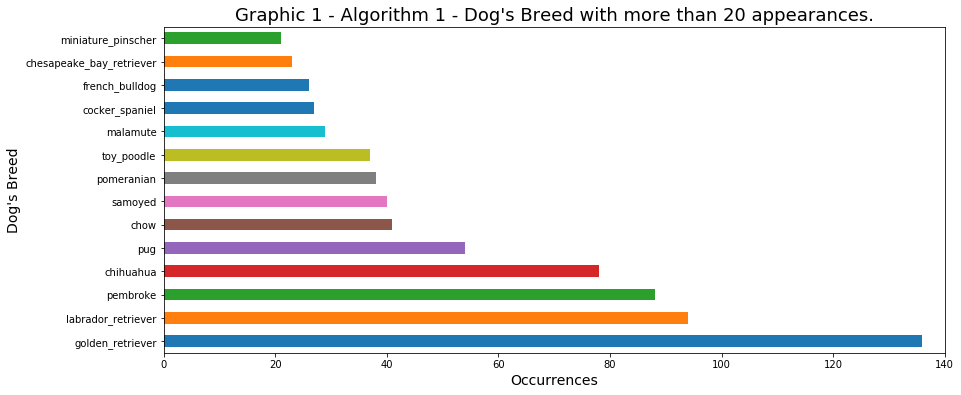

In [166]:
# Value counts to build a histogram.
dog_pref = df_viz[df_viz.p1_dog].p1.value_counts()

# Plotting the graphic.
title = "Graphic 1 - Algorithm 1 - Dog's Breed with more than 20 appearances."
x_label = "Occurrences"
y_label = "Dog's Breed"
gp_pop_dog(dog_pref,title,x_label,y_label,font,font_title)

#### P2 algorithm

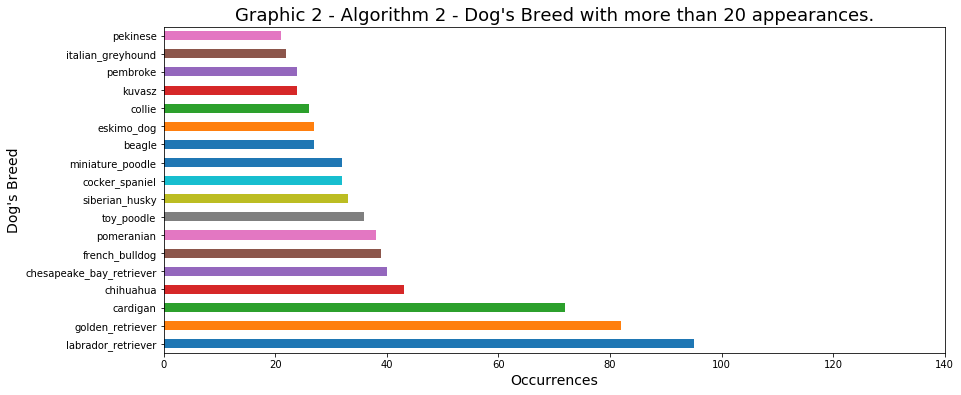

In [167]:
# Dog Preference - Algorithm P2

# Value counts to build a histogram.
dog_pref = df_viz[df_viz.p2_dog].p2.value_counts()

# Plotting the graphic.
title = "Graphic 2 - Algorithm 2 - Dog's Breed with more than 20 appearances."
x_label = "Occurrences"
y_label = "Dog's Breed"
gp_pop_dog(dog_pref,title,x_label,y_label,font,font_title)

#### P3 Algorithm

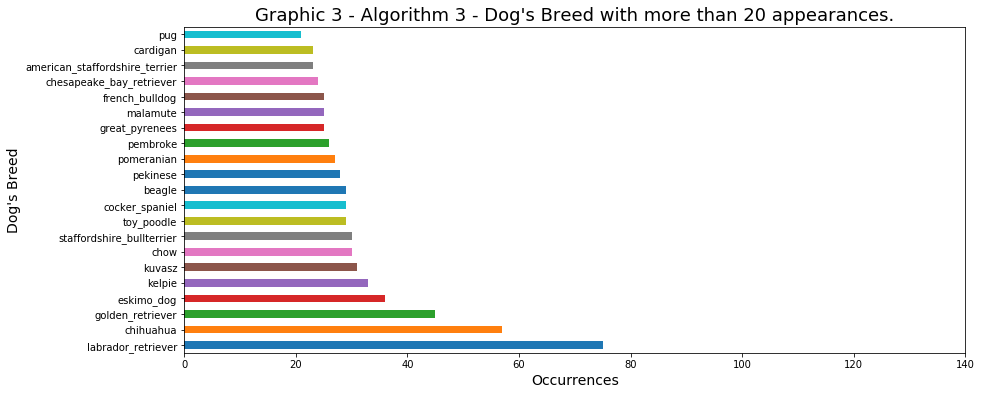

In [168]:
# Dog Preference - Algorithm P3

# Value counts to build a histogram.
dog_pref = df_viz[df_viz.p3_dog].p3.value_counts()

# Plotting the graphic.
title = "Graphic 3 - Algorithm 3 - Dog's Breed with more than 20 appearances."
x_label = "Occurrences"
y_label = "Dog's Breed"
gp_pop_dog(dog_pref,title,x_label,y_label,font,font_title)

*Based on the graphics, the P1 algorithm has fewer breeds and high concentrated bars in some breeds, in the opposite way the P3 algorithm has much more breeds and the dogs are spread in more breeds, in other words, less concentrated bars.*

In [169]:
# Calculating the percentages by algorithms.
p1_perc = round(100 * df_viz[df_viz.p1_dog].shape[0]/df_viz.shape[0],2)
p2_perc = round(100 * df_viz[df_viz.p2_dog].shape[0]/df_viz.shape[0],2)
p3_perc = round(100 * df_viz[df_viz.p3_dog].shape[0]/df_viz.shape[0],2)

# Printing a summary.
print("P1: {}%\nP2: {}%\nP3: {}%".format(p1_perc,p2_perc,p3_perc))

P1: 74.29%
P2: 75.15%
P3: 72.66%


*All three algorithm has almost the same performance (percentage of picture classified as a dog):*
* P1: 1462/1968 = 74.29%
* P2: 1479/1968 = 75.15%
* P3: 1420/1968 = 72.66%

Performance wise P2 > P1 > P3

In [170]:
# Calculating the number of breeds in each algorithm with more than 20 occurencies.
p1_qty = sum(df_viz[df_viz.p1_dog].p1.value_counts() > 20)
p2_qty = sum(df_viz[df_viz.p2_dog].p2.value_counts() > 20)
p3_qty = sum(df_viz[df_viz.p3_dog].p3.value_counts() > 20)

# Printing a summary of occurencies.
print("P1: {} breeds.\nP2: {} breeds.\nP3: {} breeds.".format(p1_qty,p2_qty,p3_qty))

P1: 14 breeds.
P2: 18 breeds.
P3: 21 breeds.


*It is clear that the third algorithm has 33.33% more breeds than the first algorithm*

In [171]:
# Calculating the number of dogs classified using the threshold of 20.
dog_qty_20_p1 = sum(df_viz[df_viz.p1_dog].p1.value_counts()[df_viz[df_viz.p1_dog].p1.value_counts() > 20])
dog_qty_20_p2 = sum(df_viz[df_viz.p2_dog].p2.value_counts()[df_viz[df_viz.p2_dog].p2.value_counts() > 20])
dog_qty_20_p3 = sum(df_viz[df_viz.p3_dog].p3.value_counts()[df_viz[df_viz.p3_dog].p3.value_counts() > 20])

# Printing a summary of occurencies.
print("P1: {} dogs.\nP2: {} dogs.\nP3: {} dogs.".format(dog_qty_20_p1,dog_qty_20_p2,dog_qty_20_p3))

P1: 732 dogs.
P2: 713 dogs.
P3: 671 dogs.


**Conclusion**: *The algorithm 1 is more skewness than the other two, and tend to concentrate the classification in a few breeds. On the other hand, the third algorithm is more generalist, spreading the dogs in a more variety of breeds.*

#### 2. Tweets Correlation: Favorite and Retweet

Here we will investigate if there are a correlation between Favorite and Retweet. We'll plot a simple scatter plot.

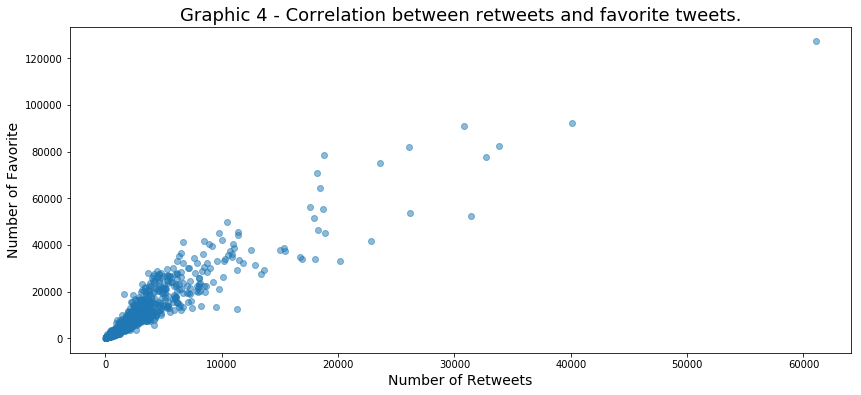

In [172]:
plt.figure(figsize= [14,6])                               # Graphic size
plt.scatter(x = df_viz['retweet_count'],                  # X varibale
            y = df_viz['favorite_count'],                 # Y variable
            alpha = transparency)                         # Transparency
plt.xlabel('Number of Retweets', fontsize = font)         # X label
plt.ylabel('Number of Favorite', fontsize = font)         # Y label
plt.title('Graphic 4 - Correlation between retweets and favorite tweets.',
          fontsize = font_title)                         # Graphic Title
plt.show()                                               # Plot the graphic

Graphically, it is possible to see a positive trend (correlation) between both variables. Thus, let's calculate a naive rate for each retweet how many favourites it will generate (in average).

In [173]:
# Calculating the rate for each retweet how many favorite will produce in average.
fav_ret_rate = df_viz.favorite_count/df_viz.retweet_count

# Calculating of mean, standard deviation, etc.
fav_ret_rate[np.logical_not(df_viz.favorite_count.isnull())].describe()

count    1280.000000
mean        3.384297
std         1.150137
min         1.107146
25%         2.580705
50%         3.219539
75%         3.955537
max        11.765060
dtype: float64

**Conclusion**: *Seems there is a very positive correlation when the number of favourites raises the numbers of retweets also raises. Using a straightforward analysis for each new retweet the favourites will increase 3 (in average).*

#### 3. Doggo, Puppo, Pupper or Floofer - Which is more adorable ?

Here we can calculate the mean and favourite per retweet rate to compare the dogtionary terms.

In [174]:
# Copying the original data frame for a pontual analysis.
df_dogtionary = df_viz.copy()

# Filling the NaN values with None.
df_dogtionary.dogtionary = df_dogtionary.dogtionary.fillna('None')

# Mean calculation.
df_dog_mean = df_dogtionary.groupby(['dogtionary'])['favorite_count','retweet_count'].mean()

# Rate calculation.
df_dog_mean = df_dog_mean.join(pd.DataFrame(df_dog_mean.favorite_count/df_dog_mean.retweet_count, columns = ['rate']))

# Count calculation.
df_dog_mean_count = df_dog_mean.join(df_dogtionary.dogtionary.value_counts())

# Copying the column's name.
col_names = df_dog_mean_count.columns.tolist()

# Editing the columns names.
col_names[3] = 'count'

# Assigning a proper name.
df_dog_mean_count.columns = col_names

# Printing the summary.
df_dog_mean_count

,favorite_count,retweet_count,rate,count
dogtionary,,,,
None,8062.129870,2393.982375,3.367665,1665
doggo,14410.558824,4851.058824,2.970601,63
floofer,5643.000000,2172.000000,2.598066,7
multiclass,19020.250000,6341.375000,2.999389,10
pupper,6529.219858,2122.219858,3.076599,201
puppo,14684.933333,4292.266667,3.421254,22


**Conclusion**: *Based on the summary above, in average, dogs without a dogtionary classification tend to perform better rates of favourite per retweet. Have in mind, the few observations of floofer and puppo.*

We will try to analyse the above more visually

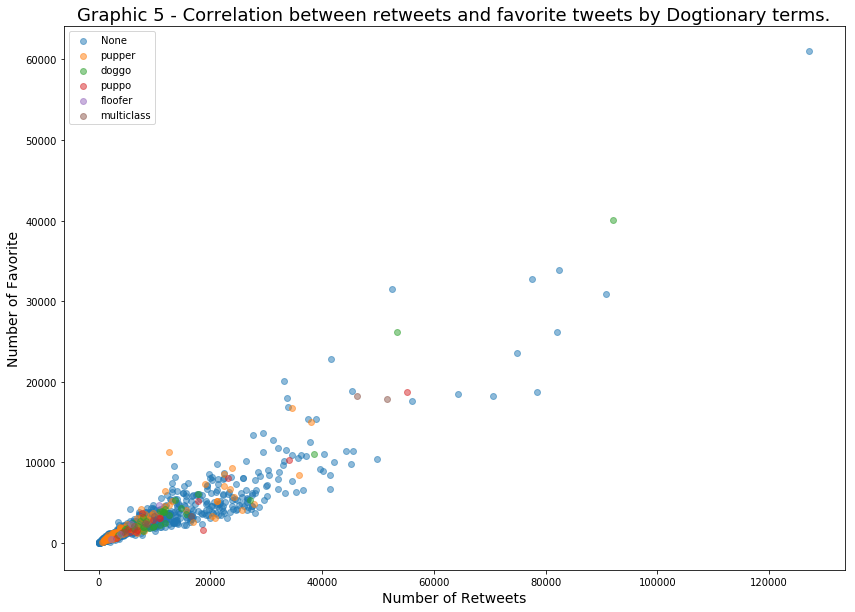

In [175]:
# Copying the original data frame for a pontual analysis.
df_dog_viz = df_viz.copy()

# Filling the NaN values with None.
df_dog_viz.dogtionary = df_dog_viz.dogtionary.fillna('None')

# List of term in dogtionary.
dog_terms = ['None', 'pupper', 'doggo', 'puppo', 'floofer', 'multiclass'] # The order is ascending.

# Graphic Size.
plt.figure(figsize = [14, 10])                               

# Loop to construct the graphic "layers".
for index in dog_terms:
    # Provisory data frame to subset the specific "index" dogtionary term.
    prov = df_dog_viz[df_dog_viz['dogtionary'] == index][['favorite_count','retweet_count']]
    # Plotting
    plt.scatter(x = prov['favorite_count'],  # X axis data.
                y = prov['retweet_count'] ,  # Y axis data.
                alpha = transparency)        # Points transparency.
plt.xlabel('Number of Retweets',     # X label.
           fontsize = font)          # X axis fontsize.
plt.ylabel('Number of Favorite',     # Y label.
           fontsize = font)          # Y axis fontsize.
plt.title('Graphic 5 - Correlation between retweets and favorite tweets by Dogtionary terms.', # Graphic title.
          fontsize = font_title)     # Graphic Title.
plt.legend(dog_terms)                # Add legend.
plt.show()                           # Plot the graphic.

**Conclusion**: *It is not possible to identify (visually) any pattern or relationship, using the dogtionary variable, although there is a strong and positive correlation between Retweets and Favorite.*

#### 4. Tweet's Profile over the time

How is the behaviour of tweets along the week? Do they have the same average?

In [176]:
# Copying the data frame to a pontual study.
df_time = df_viz.copy()

# Subsetting.
df_time = df_time[['timestamp','rating_numerator']]

# Converting full date to weekdays. 1 = Monday, 2 = Tuesday, ... , 7 = Sunday
df_time.timestamp = list(map(lambda x : x.isoweekday(), df_time.timestamp))

# Calculating the mean of ratings.
df_time_mean = df_time.groupby(['timestamp']).mean()

# Adding a new columns: number of occurencies.
df_time_mean = df_time_mean.join(pd.DataFrame(df_time.timestamp.value_counts()))

# Setting strings as index (preparing to the plot).
#df_time_mean.index = [1,2,3,4,5,6,7]
df_time_mean.index = ['Monday','Tuesday','Wednesday','Thurday','Friday','Saturday','Sunday']

# Editing the variable name.
df_time_mean.columns = ['Avg Rating','Tweets Number']
idx = ['01','02','03','04','05','06','07']
df_time_mean['idx'] = idx

# Summary of Average Rating over the weekdays and grouped by the tweets's number.
df_time_mean

,Avg Rating,Tweets Number,idx
Monday,10.342593,324,01
Tuesday,10.602302,291,02
Wednesday,10.453925,293,03
Thurday,10.706250,280,04
Friday,10.692688,279,05
Saturday,10.586694,248,06
Sunday,10.454545,253,07


Analysing the above chunk output, it is not clear the behaviour. We'll try to analyse it visually.

In [177]:
import datetime
from matplotlib.dates import  DateFormatter, DayLocator

In [178]:
'''
This function aims to plot a graphic using barchart and lines. Both side of the Y axis will be used.
INPUTS:
VARIABLE   TYPE         DESCRIPTION
df_x       data frame   The entire data frame.
df_y1      data frame   The variable to be displayed as bar.
df_y2      data frame   The variable to be displayed as line.
gp_title   str          Graphic title.
xlabel     str          X axis label.
ylabel     str          Y axis label.
font       str          Axis labels font size.
font_title str          Graphic Title font size.
OUTUPUTS:
VARIABLE     TYPE   DESCRIPTION
graphic      -      Returns a matplotlib graphic.
'''
# Function to plot a barplot and line.
def gp_bar_line(df_x, df_y1, df_y2, gp_title, xlabel, ylabel, font = font, font_title = font_title):
    # Graphic Settings.
    fig, ax1 = plt.subplots(figsize = [14,6])
    # First Element: Blue bars.
    color = 'tab:blue'
    ax1.set_xlabel(xlabel, fontsize = font)
    ax1.set_ylabel('Avg Rating', color = color, fontsize = font)
    ax1.bar(df_x.idx, df_y1, color = color)
    ax1.tick_params(axis = 'y', labelcolor = color)
    ax1.set_xticklabels(df_x.index)

    # Second Element: Red line.
    ax2 = ax1.twinx()  # share axis with ax1 element.
    color = 'indianred'
    ax2.set_ylabel(ylabel, color = color, fontsize = font)  # we already handled the x-label with ax1
    ax2.plot(df_x.idx, df_y2, color = color, linewidth = 5)
    ax2.tick_params(axis = 'y', labelcolor = color)
    ax2.set_xticklabels(df_x.index)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(gp_title,                # Graphic title.
              fontsize = font_title)   # Graphic font title.
    return plt.show()

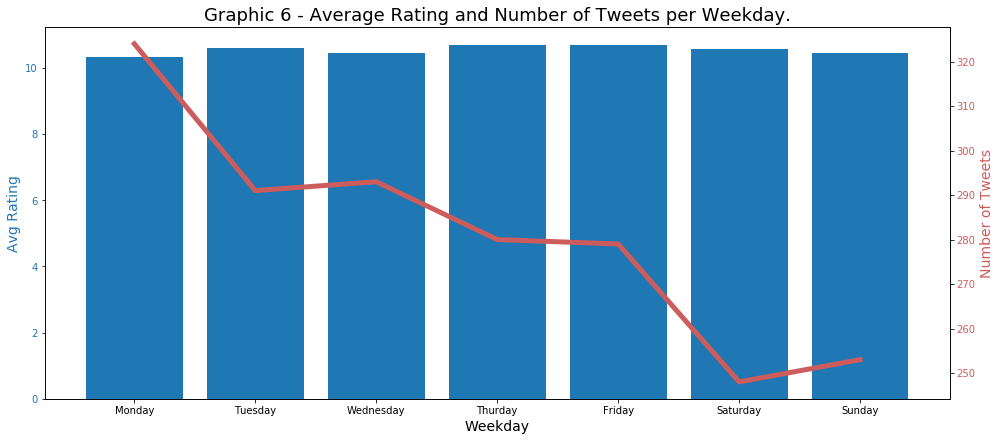

In [179]:
# Plotting Average Rating over the weekdays.
gp_bar_line(df_x = df_time_mean,
            df_y1 = df_time_mean['Avg Rating'],
            df_y2 = df_time_mean['Tweets Number'],
            gp_title = 'Graphic 6 - Average Rating and Number of Tweets per Weekday.',
            xlabel = 'Weekday',
            ylabel = 'Number of Tweets')

*Conclusion: Although the number of tweets decreases along the weekend, the average stay (almost) steadily. In average, Monday is the weekday with highest tweets average.*

In [180]:
# Copying the data frame to a pontual study.
df_month = df_viz.copy()

# Subsetting
df_month = df_month[['timestamp','rating_numerator']]

# Converting full date to month.
df_month.timestamp = list(map(lambda x : x.month, df_month.timestamp))

# Calculating the mean of ratings.
df_month_mean = df_month.groupby(['timestamp']).mean()

# Adding a columns with value counts.
df_month_mean = df_month_mean.join(pd.DataFrame(df_month.timestamp.value_counts()))

# Renaming the index.
df_month_mean.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Editing the variable name.
df_month_mean.columns = ['Avg Rating','Tweets Number']
idx = ['01','02','03','04','05','06','07','08','09','10','11','12']
df_month_mean['idx'] = idx

# Printing the summary.
df_month_mean

,Avg Rating,Tweets Number,idx
Jan,10.711207,232,01
Feb,10.889535,172,02
Mar,10.939394,165,03
Apr,11.287234,94,04
May,11.683673,98,05
Jun,11.073171,123,06
Jul,11.533088,136,07
Aug,11.000000,61,08
Sep,11.194762,63,09
Oct,11.673077,65,10


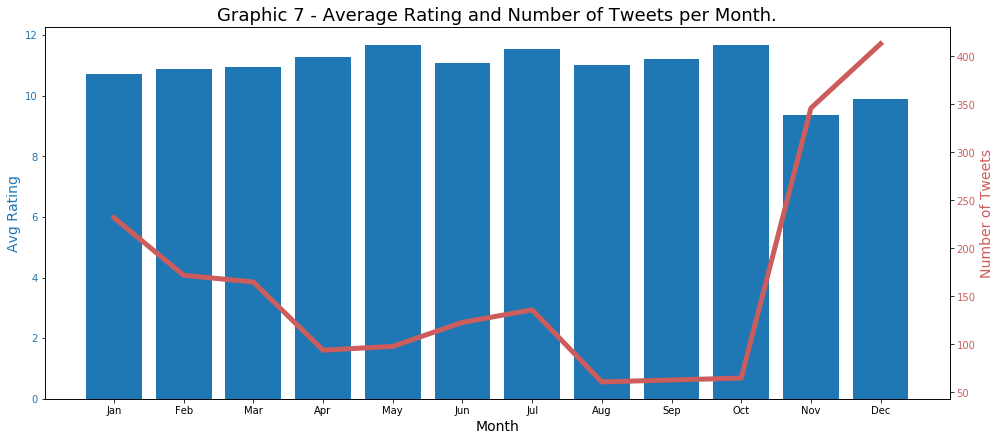

In [181]:
# Plotting Average Rating over the weekdays.
gp_bar_line(df_x = df_month_mean,
            df_y1 = df_month_mean['Avg Rating'],
            df_y2 = df_month_mean['Tweets Number'],
            gp_title = 'Graphic 7 - Average Rating and Number of Tweets per Month.',
            xlabel = 'Month',
            ylabel = 'Number of Tweets')

In the above graph, along x axis<br>
**01 = January
02 = February
03 = March
04 = April
05 = May
06 = June
07 = July
08 = August
09 = September
10 = October
11 = November
12 = December**

*Conclusion: Although December and November have the highest number of tweets, the average rating goes in the opposite way. These two months have the lowest number of average ratings. There is strong evidence of seasonality.*

#### 5. Dog Breeds Appeal
Analyzing which breed is having more reactions

In [182]:
'''
This function aims to plot a graph using barchart and lines. Both side of the Y axis will be used.
INPUTS:
VARIABLE   TYPE         DESCRIPTION
df_viz     data frame   The entire data frame (imported from twitter_archive_master.csv).
algorithm  str          Could be p1, p2 or p3.
threshold  int          Breed's number to be displayed in the graphic.
sorting    bool         True: ascending, False: descending.
OUTUPUTS:
VARIABLE   TYPE         DESCRIPTION
df_alg     data frame   Data frame with 'threshold' rows and 3 columns (favorite_count,
                        retweet_count, and rate). It is indexed by dog's breed.
'''

# This functions is to wrap code lines. The result of this function is the input of gp_triple function.
def df_gp_triple(df_viz, algorithm, threshold = 20, sorting = False):
    # According to the algorithm I will subset the df_viz using differents rows.
    if algorithm == 'p1':
        df_alg = df_viz[['rating_numerator','p1','p1_dog','retweet_count','favorite_count']]
        df_alg = df_alg[df_alg.p1_dog]
        df_alg = df_alg.groupby(['p1']).sum()
    elif algorithm == 'p2':
        df_alg = df_viz[['rating_numerator','p2','p2_dog','retweet_count','favorite_count']]
        df_alg = df_alg[df_alg.p2_dog]
        df_alg = df_alg.groupby(['p2']).sum()
    else:
        df_alg = df_viz[['rating_numerator','p3','p3_dog','retweet_count','favorite_count']]
        df_alg = df_alg[df_alg.p3_dog]
        df_alg = df_alg.groupby(['p3']).sum()

    # Removing the 'p#', 'p#_dog', and 'rating_numerator' columns.
    df_alg = df_alg[['favorite_count','retweet_count']]

    # Adding a new columns with the rate (favorite divided by retweet)
    df_alg = df_alg.join(pd.DataFrame(df_alg['favorite_count']/df_alg['retweet_count']))

    # Renaming columns.
    df_alg.columns = ['favorite_count','retweet_count','rate']

    # Sorting by favorite_count.
    df_alg = df_alg.sort_values(by = 'rate', ascending = sorting)[:threshold]
    
    # return df_alg.
    return df_alg

In [183]:
# Subsetting the df_viz using the function df_gp_triple.
df_p1 = df_gp_triple(df_viz,
                     algorithm = 'p1')
#df_p1.index = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
idx = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
df_p1['idx'] = idx

# Printing the first 5 rows.
df_p1.head()

,favorite_count,retweet_count,rate,idx
p1,,,,
german_short_haired_pointer,27523.0,4455.0,6.178002,01
basset,122353.0,23171.0,5.280437,02
irish_terrier,34710.0,6583.0,5.272672,03
rhodesian_ridgeback,12956.0,2479.0,5.226301,04
bloodhound,25891.0,5080.0,5.096654,05


*Let us try to plot the result into graphs*

In [184]:
list(df_p1.index)

['german_short_haired_pointer',
 'basset',
 'irish_terrier',
 'rhodesian_ridgeback',
 'bloodhound',
 'cairn',
 'doberman',
 'saluki',
 'bedlington_terrier',
 'siberian_husky',
 'bull_mastiff',
 'eskimo_dog',
 'bernese_mountain_dog',
 'scottish_deerhound',
 'english_springer',
 'yorkshire_terrier',
 'greater_swiss_mountain_dog',
 'french_bulldog',
 'old_english_sheepdog',
 'staffordshire_bullterrier']

In [185]:
'''
This function aims to plot a graph using barchart and lines. Both side of the Y axis will be used.
INPUTS:
VARIABLE   TYPE         DESCRIPTION
df_x       data frame   The entire data frame (imported from twitter_archive_master.csv).
df_y1      data frame   The variable to be displayed as blue bar 1.
df_y2      data frame   The variable to be displayed as orange bar 2.
df_y3      data frame   The variable to be displayed as line.
algorithm  str          Could be 'p1', 'p2' or 'p3'.
gp_title   str          Graphic title.
xlabel     str          X axis label.
ylabel     str          Y axis label.
font       str          Axis labels font size.
font_title str          Graphic Title font size.
width      str          Barchart width.
OUTUPUTS:
VARIABLE     TYPE   DESCRIPTION
graphic      -      Returns a matplotlib graph.
'''
# Function to plot the df_gp_triple data frame.
def gp_triple(df_x, df_y1, df_y2, df_y3, algorithm, gp_title, xlabel, ylabel,
              font = font, font_title = font_title, width = width):
    # Defining the subplot and Graphic size.
    fig, ax1 = plt.subplots(figsize = [14,8])

    # First element: Blue Barchart
    color = 'tab:blue'
    ax1.set_xlabel('Dog\'s Breed', fontsize = font)
    ax1.set_ylabel('Number of Retweets\nNumber of Favorite', color=color, fontsize = font)
    ax1.bar(df_x.idx, df_y1, width, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.tick_params(axis='x', rotation = 90)
    ax1.set_xticklabels(df_x.index)

    # Second element: Orange Barchart
    ax3 = ax1.twiny() 
    color = 'tab:orange'
    ax3.bar(df_x.idx, df_y2, width, color=color)
    ax3.tick_params(axis='x', labelcolor=color, top = False)
    ax3.set_xticklabels(labels = [], axis='x', labelcolor = color, top = False)

    # Third element: Red Line
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'indianred'
    ax2.set_ylabel('Favorite/Retweet', color=color, fontsize = font)  # we already handled the x-label with ax1
    ax2.plot(df_x.idx, df_y3, color=color, linewidth = 3)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_xticklabels(df_x.index)

    # Avoid right y-label to be slightly clipped
    fig.tight_layout() 
    
    # According to the algorithm the average is different because the subsetting differents rows. 
    if algorithm == 'p1':
        df_alg = df_viz[df_viz.p1_dog]
    elif algorithm == 'p2':
        df_alg = df_viz[df_viz.p2_dog]
    else:
        df_alg = df_viz[df_viz.p3_dog]
    
    # Subsetting: removing any NaN or Null rows.
    df_alg_fav = df_alg[np.logical_not(df_alg.retweet_count.isnull())].favorite_count
    df_alg_ret = df_alg[np.logical_not(df_alg.retweet_count.isnull())].retweet_count
    
    # Calculating the rate = favorites/tweets, this is a vector.
    df_alg_rate = df_alg_fav/df_alg_ret
    
    # Calculating the mean, this is a single value.
    df_alg_rat_fav_ret = df_alg_rate.mean()
    
    # Plotting a dotted green line as average.
    plt.axhline(y = df_alg_rat_fav_ret, color='green', linestyle='--')

    # Defining the Graphic Title.
    plt.title(gp_title, fontsize = font_title)
    
    # Plot.
    return plt.show()

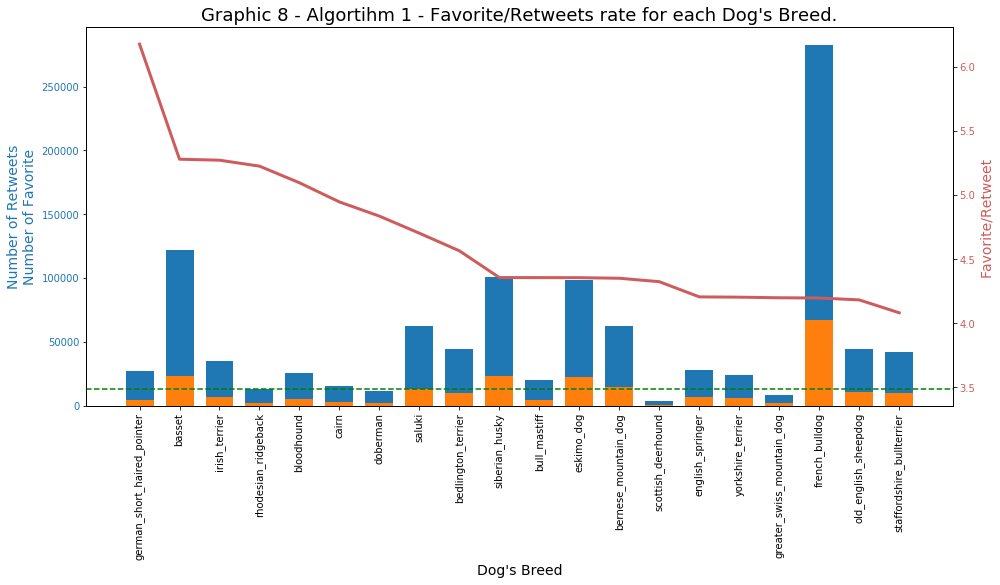

In [186]:
# Plotting a graphic using the output of df_gp_triple as input of gp_triple.
gp_triple(df_x = df_p1,
          df_y1 = df_p1['favorite_count'],
          df_y2 = df_p1['retweet_count'],
          df_y3 = df_p1['rate'],
          algorithm = 'p2',
          gp_title = 'Graphic 8 - Algortihm 1 - Favorite/Retweets rate for each Dog\'s Breed.',
          xlabel = 'Dog\'s Breed',
          ylabel = 'Number of Retweets\nNumber of Favorite')

*The blue bar means the number of favourites, the orange bar the number of retweets, dotted green line the average of Favorite/Retweets for all dog breeds, and the red line the value of the Favorite/Retweet for each dog breed.*

In [187]:
'''
This function aims to plot a graph using barchart and lines. Both side of the Y axis will be used.
INPUTS:
VARIABLE   TYPE         DESCRIPTION
df_viz     data frame   The entire data frame (imported from twitter_archive_master.csv).
df_x       data frame   The entire data frame (imported from twitter_archive_master.csv).
df_y1      data frame   The variable to be displayed as blue bar 1.
df_y2      data frame   The variable to be displayed as orange bar 2.
df_y3      data frame   The variable to be displayed as line.
algorithm  str          Could be 'p1', 'p2' or 'p3'.
gp_title   str          Graphic title.
xlabel     str          X axis label.
ylabel     str          Y axis label.
font       str          Axis labels font size.
font_title str          Graphic Title font size.
threshold  int          Breed's number to be displayed in the graphic.
sorting    bool         True: ascending, False: descending.
OUTUPUTS:
VARIABLE     TYPE   DESCRIPTION
graph      -        Returns a matplotlib graph
DEPENDENCIES:
VARIABLE         TYPE        DESCRIPTION
df_gp_triple     function    Generates a Data Frame which is used as input of gp_triple.
gp_triple        function    Create the graphic using the output of df_gp_triple as input.
'''
# This function wrap the df_gp_triple and gp_triple functions.
def wrapper_triple(algorithm, gp_title, xlabel, ylabel,
                   df_viz = df_viz, font = font, font_title = font_title, threshold = 20, sorting = False):
    # Subset the df_viz according to the algorthm.
    df_alg = df_gp_triple(df_viz,
                          algorithm = algorithm,
                          threshold = threshold,
                          sorting = sorting)
    idx = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
    df_alg['idx'] = idx
    
    # Plot a graphic according to the df_alg.
    gp_triple(df_x = df_alg,
          df_y1 = df_alg['favorite_count'],
          df_y2 = df_alg['retweet_count'],
          df_y3 = df_alg['rate'],
          algorithm = algorithm,
          gp_title = gp_title,
          xlabel = xlabel,
          ylabel = ylabel)

*Plotting graph for algorithm P2*

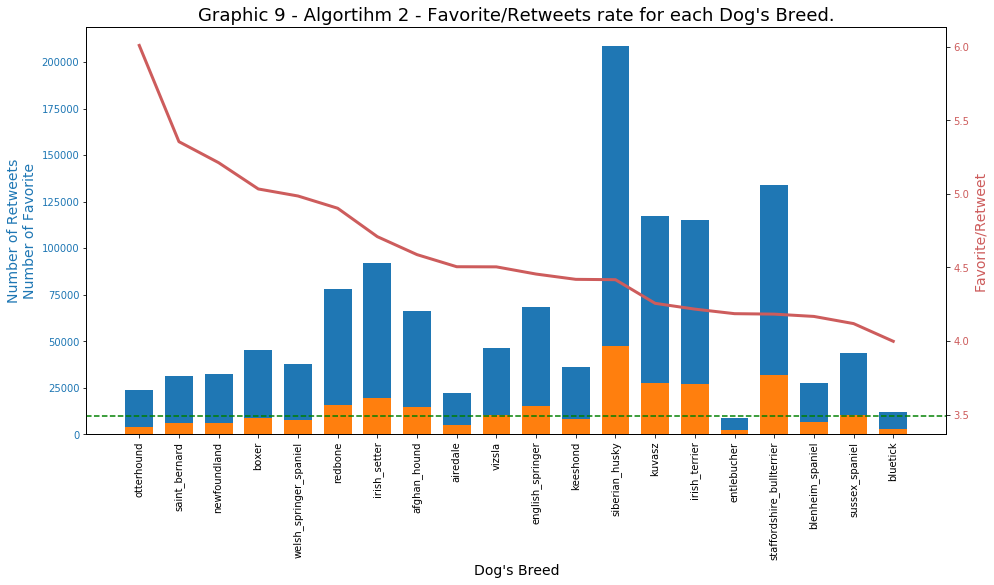

In [188]:
wrapper_triple(algorithm = 'p2',
               gp_title = 'Graphic 9 - Algortihm 2 - Favorite/Retweets rate for each Dog\'s Breed.',
               xlabel = 'Dog\'s Breed',
               ylabel = 'Number of Retweets\nNumber of Favorite')

Finally, plotting the same graph for the P3 algorithm.

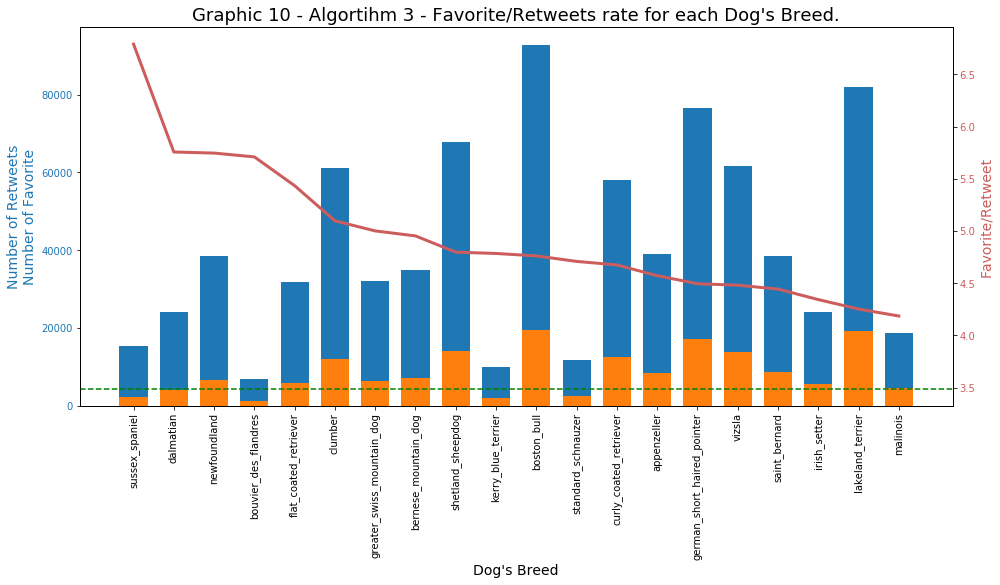

In [189]:
wrapper_triple(algorithm = 'p3',
               gp_title = 'Graphic 10 - Algortihm 3 - Favorite/Retweets rate for each Dog\'s Breed.',
               xlabel = 'Dog\'s Breed',
               ylabel = 'Number of Retweets\nNumber of Favorite')

*Comparing the three graphs we analyze that there is no dog breed which appears in the three graphs (8, 9, and 10), which can be interpreted as very distinct algorithms calibration.*

*Conclusion: Unfortunately, it is not possible to determinate which dog breed has the highest impact in respect to the number of retweets and favourite. because for each algorithm a different breed has performed the highest impact. There is no consensus.*

#### 6. Algorithm Correlation
In accordance with the Dog Breeds Appeal, let's investigate the output of the algorithm in respect to the Favorite/Retweet rate. We'll increase the number of breeds analysed by the algorithm to 40 because 20 there are no breeds which appear in the three algorithms.

In [190]:
'''
This function creates a data frame with rate (favorit/retweet) of all algorthms, each row is a dog's breed.
INPUTS:
VARIABLE   TYPE         DESCRIPTION
df_viz     data frame   The entire data frame (imported from twitter_archive_master.csv).
threshold  int          Breed's number to be displayed in the graphic.
sorting    bool         True: ascending, False: descending.
OUTUPUTS:
VARIABLE     TYPE          DESCRIPTION
df_thr       data frame    Returns a data frame with rate calculated of all algorithms.
DEPENDENCIES:
VARIABLE         TYPE        DESCRIPTION
df_gp_triple     function    Generates a Data Frame which is used as input of gp_triple.
'''
# Defininf a function to calculate the rate dataframe.
def df_rate(threshold,sorting = False, df_viz = df_viz):
    # Calculating the new Data Frame for each algorithm.
    df_p1_thr = df_gp_triple(df_viz, 'p1', threshold = threshold, sorting = sorting)
    df_p2_thr = df_gp_triple(df_viz, 'p2', threshold = threshold, sorting = sorting)
    df_p3_thr = df_gp_triple(df_viz, 'p3', threshold = threshold, sorting = sorting)

    # Creating df_thr Data Frame to merge df_p1_thr and df_p2_thr.
    df_thr = pd.merge(df_p1_thr, df_p2_thr, left_index=True, right_index=True, how='outer')

    # Renaming columns.
    df_thr.columns = ['favorite_count_p1','retweet_count_p1','rate_p1',
                      'favorite_count_p2','retweet_count_p2','rate_p2']

    # Updating df_thr Data Frame to merging with df_p3_thr.
    df_thr = pd.merge(df_thr, df_p3_thr, left_index=True, right_index=True, how='outer')

    # Renaming columns.
    df_thr.columns = ['favorite_count_p1','retweet_count_p1','rate_p1',
                      'favorite_count_p2','retweet_count_p2','rate_p2',
                      'favorite_count_p3','retweet_count_p3','rate_p3']

    # Data Cleaning.
    # Removing NaN values.
    df_thr = df_thr[np.logical_not(df_thr.favorite_count_p1.isnull())]
    df_thr = df_thr[np.logical_not(df_thr.favorite_count_p2.isnull())]
    df_thr = df_thr[np.logical_not(df_thr.favorite_count_p3.isnull())]

    # Subsetting to gather only rates
    df_thr = df_thr[['rate_p1', 'rate_p2', 'rate_p3']].sort_values(by = ['rate_p3', 'rate_p2', 'rate_p1'], ascending = False)
    
    return df_thr # Return the df_thr data frame.


# Calculating the rates to threshold equal to 40.
df_rate(threshold = 40)

,rate_p1,rate_p2,rate_p3
newfoundland,3.700781,5.211597,5.745550
yorkshire_terrier,4.204334,3.784307,3.932011
kuvasz,3.675678,4.255575,3.885262
staffordshire_bullterrier,4.082564,4.182275,3.841623


Increasing the threshold, we found four (4) dog breeds
1. New found land
2. Yorkshire Terries
3. Kuvasz
4. Staffordshire Bullterrier

Wanted to check the correlation between the results of each algorithm in respect to the rate (favorite/retweet)

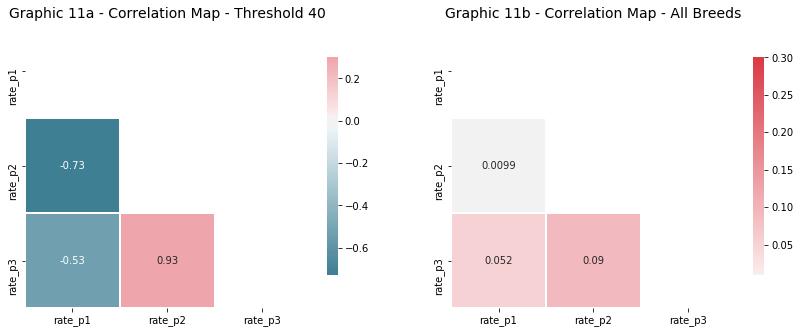

In [191]:
# Setting: Two graphics side-by-side. Size: [14,8]
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 8))

# Compute the correlation matrix
corr = df_rate(threshold = 40).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, ax = ax1,cbar_kws={"shrink": .5})

# Graphic Title to threshold 40
ax1.set_title('Graphic 11a - Correlation Map - Threshold 40', fontsize = font)

# Compute the correlation matrix
corr = df_rate(threshold = 120).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, ax = ax2,cbar_kws={"shrink": .5})

# Graphic Title to threshold 100
ax2.set_title('Graphic 11b - Correlation Map - All Breeds', fontsize = font);

Conclusion: There is no correlation between the results of the three algorithms. An analysis oblique using only the 40 breeds with the highest rate could lead us an erroneous conclusion. The Correlation Map using all breeds gave a good measure of (un)similarities between these algorithms.

#### 7. Further Analysis
* What lead some Breed has better performance than other<br>
Subset the df_viz taking only the breed with a rate above of the mean.
* When the babies arrive? Is there any correlation between dogtionary term over the year?<br>
Identify the seasons of dog's reproducibility.

### Conclusion
This project aims to perform the Data Wrangling and the Exploratory Data Analysis in the WeRateDogs™ Twitter account.

The Data Gathering process englobed three different tasks, the first one download file from URL and later loading to the Jupyter Notebook, which requires a manual step, the second downloading a file programmatically, and the third gathering data from the Twitter API.

Based on the data gathered, We have assessed the most evident issues (17 issues in total) and documented it to create a record of modifications. Later, in Data Cleaning process I have fixed all identified issues to complete, and I have also merged separated data frame into one and added some missing values. The final data frame was stored as twitter_archive_master.csv.

In the Data Analysis and Visualization, which we have interpreted as Exploratory Analysis, We have posed few questions to guide my analysis. Also have found strong evidence of:

* Seasonality in the number of tweets along the week and along the year
* A positive correlation between the number of retweets and the number of favourites
* No correlation between the algorithms output used to predict the dog breed